# Complete Guide on Time Series Analysis in Python
Hello friends,

As the name implies, this notebook is all about **Time Series Analysis**. Time series data is a sequence of data points indexed in time order. The time series analysis means analyzing the time series data using various statistical tools and teckniques.

So, let's get started.

# Table of Contents

1. [Introduction to Time Series Analysis](#1-introduction-to-time-series-analysis)
2. [Types of data](#2-types-of-data)
3. [Time Series terminology](#3-time-series-terminology)
4. [Time Series Analysis](#4-time-series-analysis)
    - [4.1 Basic Setup](#41-basic-setup)
    - [4.2 Import Data](#42-import-data)
5. [Visualize the Time Series](#5-visualize-the-time-series)
6. [Patterns in a Time Series](#6-patterns-in-a-time-series)
7. [Additive and Multiplicative Time Series](#7-additive-and-multiplicative-time-series)
8. [Decomposition of a Time Series](#8-decomposition-of-time-series)
9. [Stationary and Non-Stationary Time Series](#9-stationary-and-non-stationary-time-series)
10. [How to make a time series stationary](#10-how-to-make-a-time-series-stationary)
    - [10.1 Introduction to Diferencing](#101-introduction-to-differencing)
    - [10.2 Reasons to convert data to stationary](#102-reasons-to-convert-a-non-stationary-series-into-stationary-one-before-forecasting)
11. [How to test for stationarity](#11-how-to-test-for-stationarity)
12. [Difference between white noise and a stationary series](#12-difference-between-white-noise-and-a-stationary-series)
13. [Detrend a Time Series](#13-detrend-a-time-series)
    - [Substract the line of best fit](#131-subtract-the-line-of-best-fit)
    - [Substract the trend component from decomposition](#132-subtract-the-trend-component-from-decomposition)
14. [Deseasonalize a Time Series](#14-deseasonalize-a-time-series)
    - [Deseasonalize Using Moving Average](#141-deseasonalize-using-moving-average)
    - [Seasonal Differencing](#142-seasonal-differencing)
    - [Divide By Seasonal Index STL Decomposition](#143-divide-by-seasonal-index-stl-decomposition)
15. [How to test for seasonality of a time series](#15-how-to-test-for-seasonality-of-a-time-series)
    - [Visual Inspection](#151--visual-inspection)
    - [Autocorrelation Function ACF Plot](#152-autocorrelation-function-acf-plot)
16. [Autocorrelation and Partial Autocorrelation Functions](#16-autocorrelation-and-partial-autocorrelation-functions)
17. [Lag Plots](#17-computation-of-partial-autocorrelation-function)
18. [Granger Causality Test](#18-lag-plots)
19. [Smoothening a Time Series](#19-granger-causality-test)


# 1. Introduction to Time Series Analysis
[Table of Contents](#table-of-contents)

+ A **time-series** data is series of data points or observations recorded at irregular or regular time intervals. Typically, these data points are collected at regular intervals such as hourly, daily, weekly, monthly, quaterly, and annualy. However, irregular intervals are also possible.

+ Time series analysis is the applications of statistical methods to understand, interpret, and forecast patterns in data collected over time. Through the examination of historical data, analysts can identify trends, seasonality, and other underlying structures within series. This knowlegde is instrumental in making informed predictions about future values.

+ Visualizations, often in the form of line charts, are employed to explore the behavior of time series data graphically. Key applications of time series analysis span diverse fields, including economics, finance, business, and the natural sciences. Examples of time series data abound, from stock market indices like NASDAQ and Dow Jones to sales figures, weather patterns, and economic indicators.

+ By delving into the intricacies of time series data, researchers and practitioners can develop robust models for forecasting, anomaly detection, and other critical tasks.

**Components of a Time Series**

A time series can be decomposed into several fundamental components:

+ Trend - This represents the long-term direction of the series, indicating a general increase, decrease, or stability over time.
+ Seasonality - This component captures recurring patterns within a fixed period, such as annual, quarterly, or monthly cycles. These patterns are predictable in terms of timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.
+ Cyclical Component - This refers to fluctuations that deviate from the trend and do not exhibit a fixed periodic pattern. A cycle **refers to the period** of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
+ Irregular Variation - This encompasses random fluctuations in the data that remain after accounting for trend, seasonality, and cyclical components. These variations are unpredictable and often attributed to noise or unforeseen events. These variations are unpredictable, erratic, and may or may not be random.

To isolate and analyze these components, the Error, Trend, and Seasonality (ETS) decomposition method is commonly employed.

In this notebook, I conduct time series analysis of video game sales over time, applying time series analysis techniques to uncover underlying patterns and trends.

# 2. Types of data
[Table of Contents](#table-of-contents)

# 3. Time Series terminology
[Table of Contents](#table-of-contents)

**Key Concepts in Time Series Analysis**

Time series analysis involves a specialized vocabulary to describe the characteristics and methods employed in studying data points indexed over time.

+ Dependence: This refers to the relationship between observations of a variable at different points in time. In essence, it quantifies the influence of past values on present and future values -> (temporal dependence, spatio-temporal dependence)
+ Stationarity: A time series is stationary if its statistical properties, such as mean and variance, remain constant over time. This assumption is fundamental to many time series models.
+ Differencing: This is a transformation applied to a time series to induce stationarity. It involves subtracting consecutive values to remove trends and stabilize the series.
+ Model Specification: This process involves selecting an appropriate model to capture the underlying pattern in the time series data. It includes determining the order of autoregressive and moving average terms in models like ARIMA.
+ Exponential Smoothing: A forecasting method that assigns exponentially decreasing weights to past observations. It is effective for short-term predictions.
+ Curve Fitting: A technique used to model non-linear relationships between time and the variable of interest.
+ ARIMA (AutoRegressive Integrated Moving Average): A statistical model that combines autoregressive, differencing, and moving average components to capture the dynamics of a time series.

# 4. Time Series Analysis
**About this Dataset:** This dataset provides monthly totals of a US airline passengers from 1949 to 1960. This dataset is taken from an inbuilt dataset of R called AirPassengers.

[Table of Contents](#table-of-contents)

## 4.1 Basic setup
[Table of Contents](#table-of-contents)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data-sources'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data-sources/dataset/dataset.txt
./data-sources/air-passengers/AirPassengers.csv


## 4.2 Import data
[Table of Contents](#table-of-contents)

In [3]:
path = "./data-sources/air-passengers/AirPassengers.csv"
df = pd.read_csv(path)

+ We should rename the column names.

In [4]:
df.columns = ['Month', 'Number of Passengers']
df.head()

,Month,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 5. Visualize the Time Series
[Table of Contents](#table-of-contents)

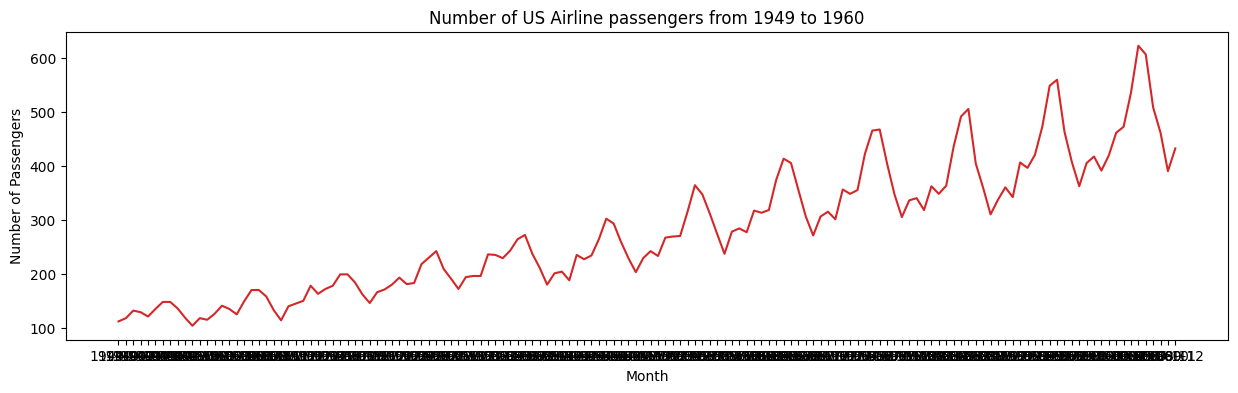

In [5]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Month'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

+ Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

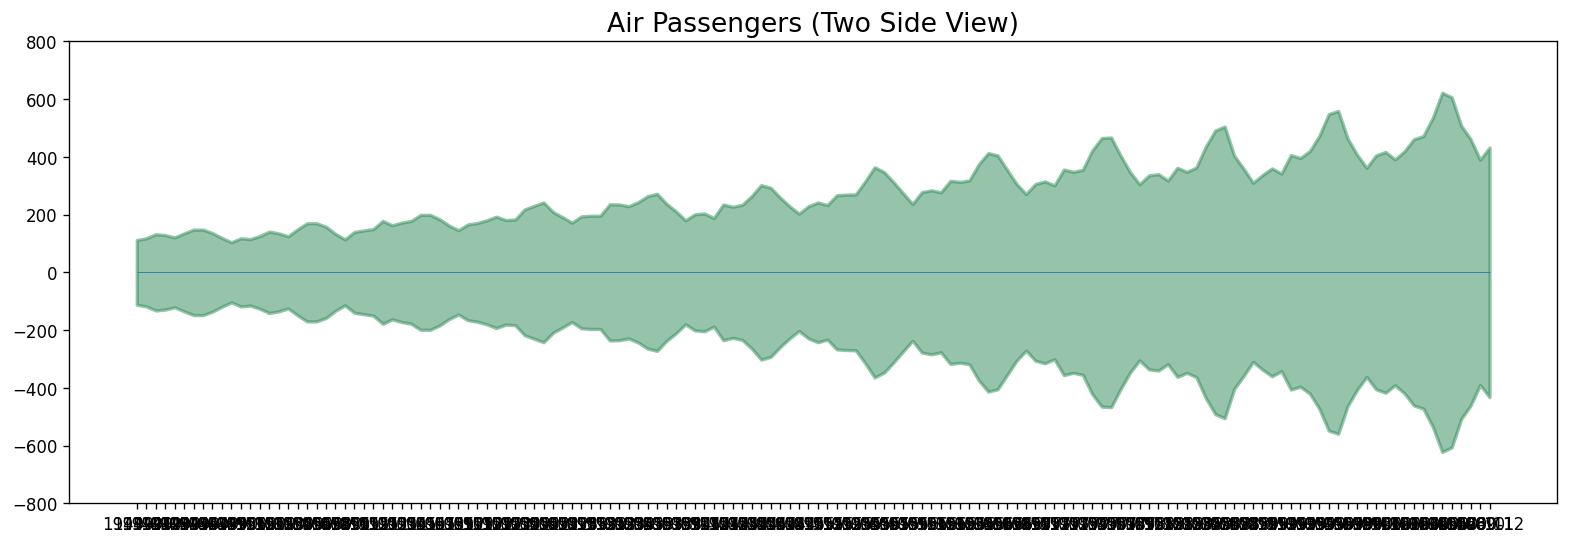

In [6]:
x = df['Month'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Month']), xmax=np.max(df['Month']), linewidth=.5)
plt.show()

+ It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

# 6. Patterns in a Time Series 
[Table of Contents](#table-of-contents)

+ Any time series vizualization may consist of the following components: **Base Level + Trend + Seasonality + Error**

**Trend**
+ A **trend** is observed when there is an increasing or decreasing slope observed in the time series.

**Seasonality**
+ A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

**Cyclic behaviour**

Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

# 7. Additive and Multiplicative Time Series
[Table of Contents](#table-of-contents)

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an **additive** or **multiplicative** time series. Each observation in the series can be expressed as either a sum or a product of the components.

**Additive time series:** Used when the seasonal effect is constant over time.

**Value** = Base Level + Trend + Seasonality + Error

**Multiplicative Time Series:** Used when the seasonal effect varies with the level of the time series. In other words, as the value increases, the seasonal effect also increases proportionally.

**Value** = Base Level x Trend x Seasonality x Error


# 8. Decomposition of Time Series
[Table of Contents](#table-of-contents)

Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.

The seasonal_decompose in statsmodels implements this conveniently.

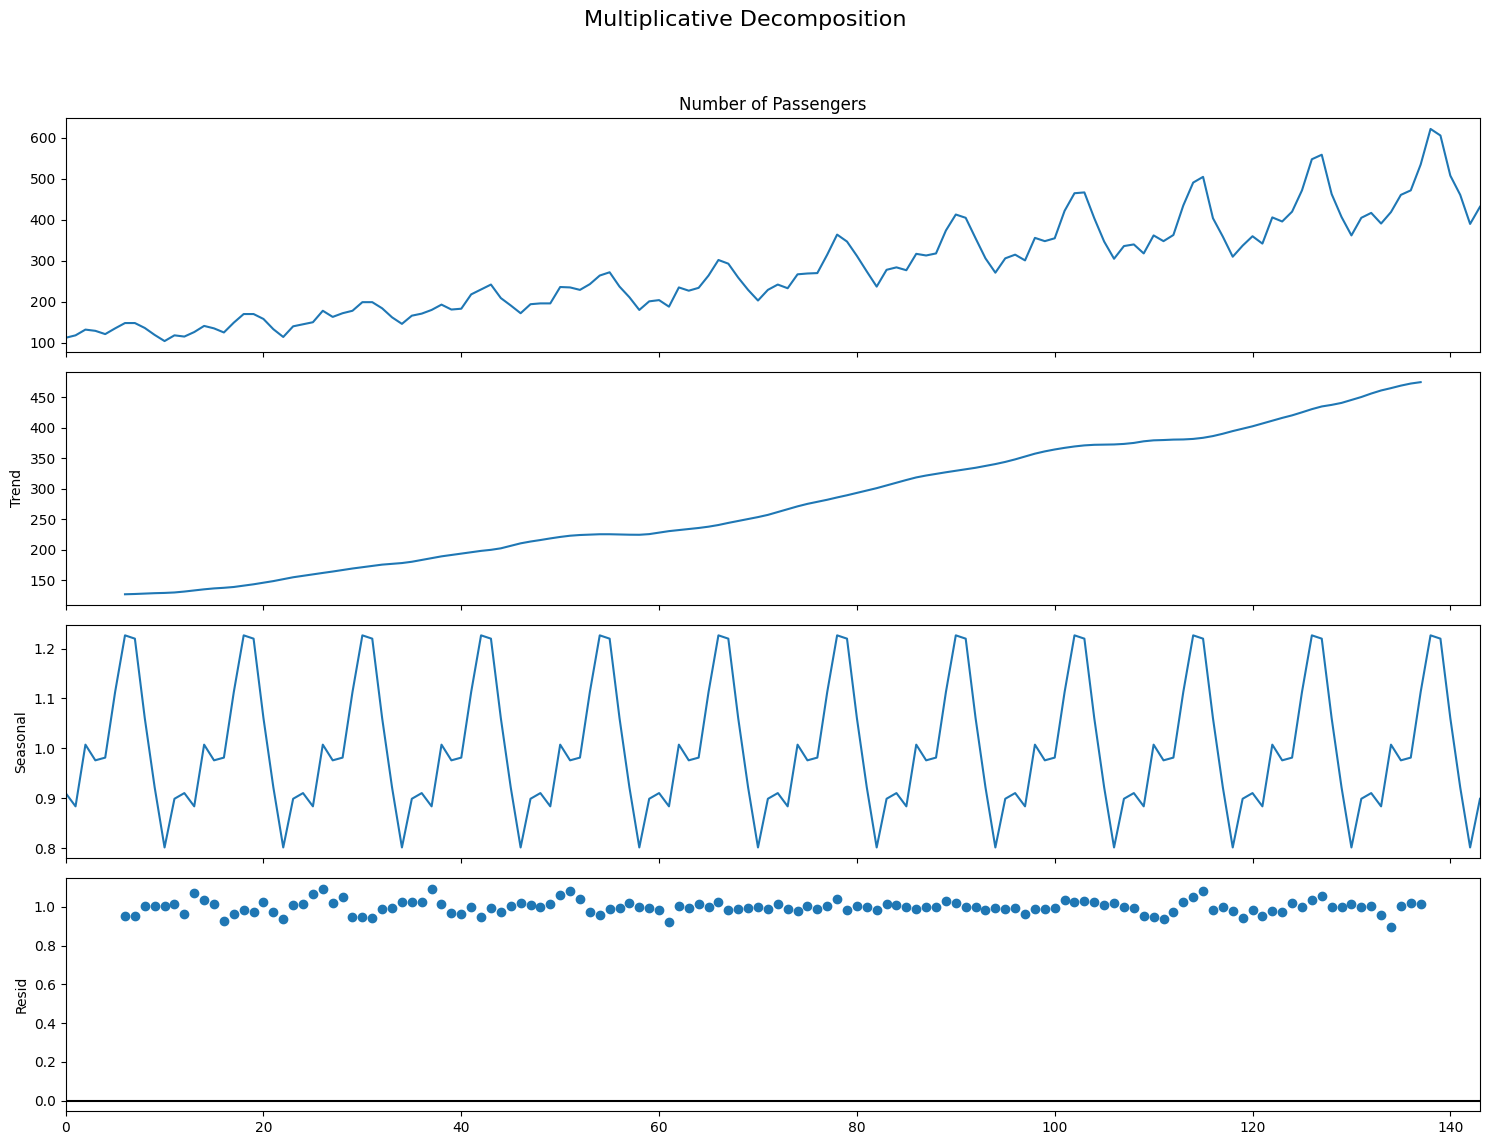

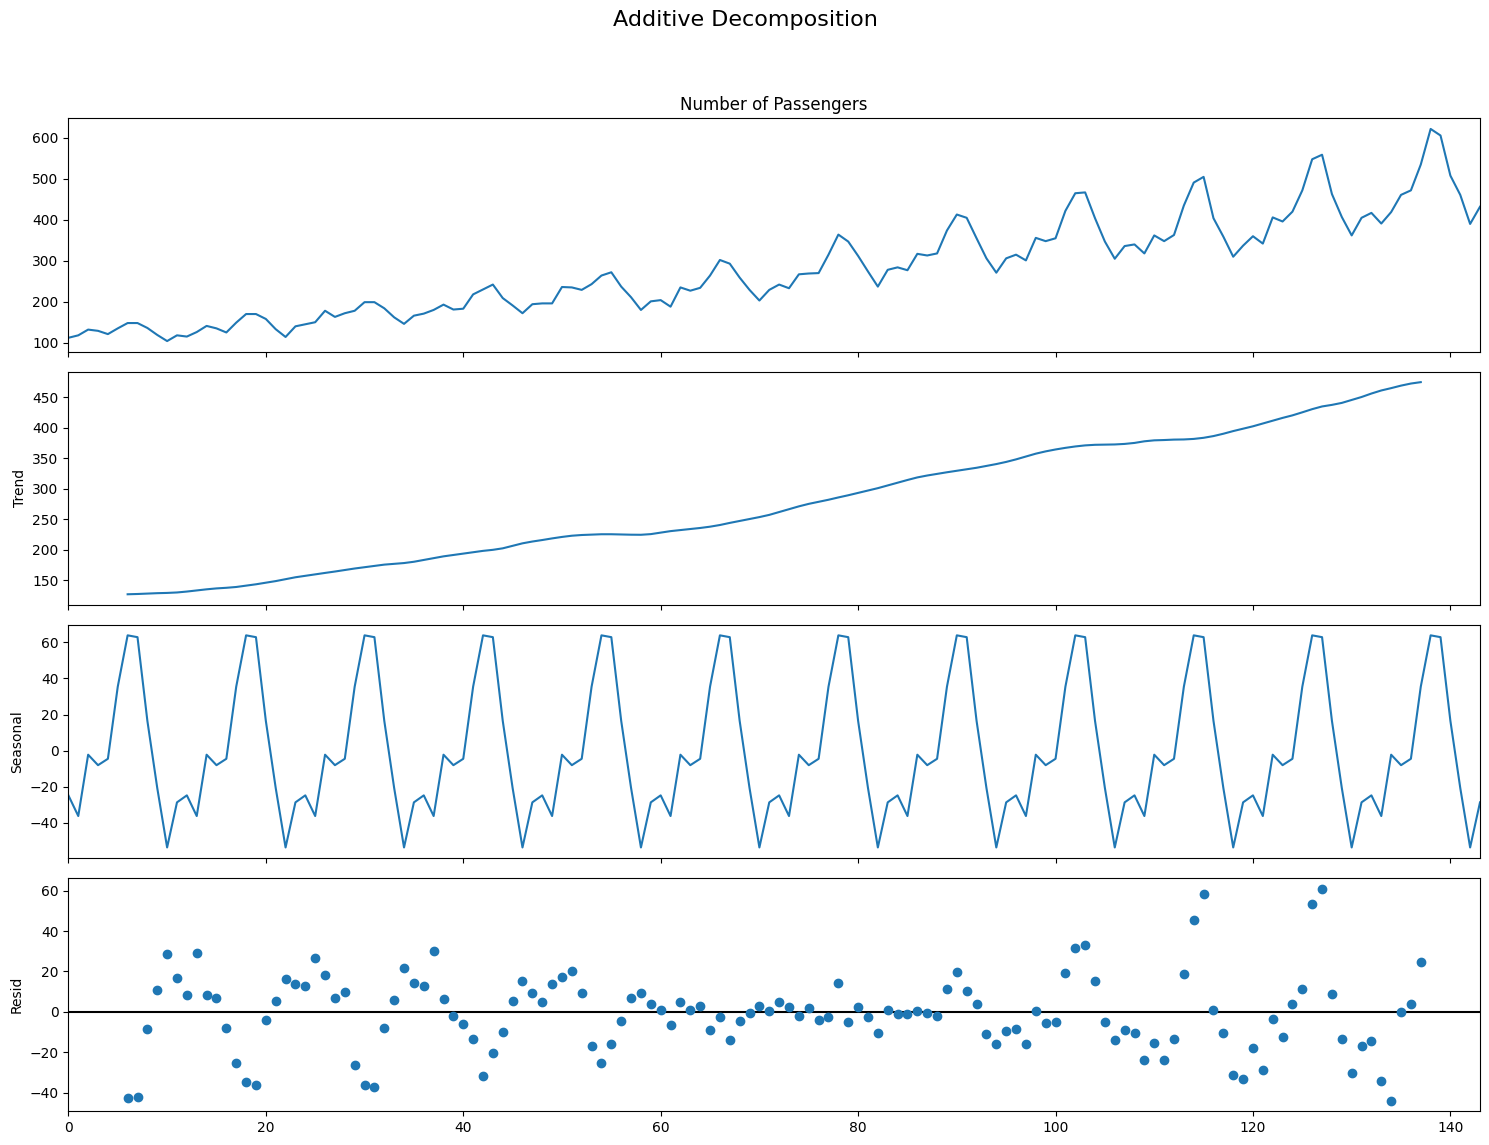

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=12)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (15,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

+ If we look at the residuals of the additive decomposition closely, it has some pattern left over.

+ The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# 9. Stationary and Non-Stationary Time Series
[Table of Contents](#table-of-contents)

Now, we wil discuss Stationary and Non-Stationary Time Series.

**Stationarity** is one whose statistical properties, such as mean, variance, and autocorrelation, are constant over time. This implies that the values of the series are not a function of time, making them independent of seasonal effects and trends. Specifically, for a time series to be stationary, the following conditions must be met:

+ Constant Mean: The mean of the series does not change over time.
+ Constant Variance: The variance of the series remains stable over time.
+ Constant Autocorrelation: The autocorrelation, or the correlation of the series with its previous values, does not change over time.

In essence, a stationary time series fluctuates around a constant mean, with the magnitude of these fluctuations also being constant. Because of these properties, a stationary time series is easier to model and predict, as its behavior is predictable and not influenced by time-related factors.

![Alt text](img/stationary-and-non-stationary-time-series.png)

+ We can covert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

# 10. How to make a time series stationary?
[Table of Contents](#table-of-contents)

We can apply some sort of transformation to make the time-series stationary. These transformation may include:
1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above

The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

## 10.1 Introduction to Differencing 
[Table of Contents](#table-of-contents)

This method involves subtracting the previous observation from the current observation to remove trends and stabilize the mean of the series.

**Definition:**

If $Y_t$ is the value at the time $t$, then the first difference of $Y$ is calculated as:
$$\triangle Y_t = Y_t - Y_{t-1}$$

If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.

**Example:**

Consider the following series: $[1, 5, 2, 12, 20]$
+ **First Differencing:**    $[5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]$
+ **Second Differencing:** $[-3-4, -10-3, 8-10] = [-7, -13, -2]$

In this example:
+ The first differencing results in the series $[4,−3,10,8]$.
+ The second differencing results in the series $[−7,13,−2]$.

## 10.2 Reasons to convert a non-stationary series into stationary one before forecasting
[Table of Contents](#table-of-contents)

There are reasons why we want to convert a non-stationary series into a stationary one. These are given below:

+ Forecasting a stationary series is relatively easy and the forecasts are more reliable.
+ An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.
+ We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

# 11. How to test for stationarity?
[Table of Contents](#table-of-contents)

**Testing for Stationarity: A Comprehensive Overview**

**Visual Inspection**

While not definitive, a visual examination of the time series plot can provide initial clues about stationarity. Look for:

+ Trends: A consistent upward or downward slope indicates non-stationarity.
+ Seasonality: Recurring patterns suggest non-stationarity.
+ Variance: If the variability of the series changes over time, it's likely non-stationary.

**Descriptive Statistics**

Comparing summary statistics (mean, variance, autocorrelation) of different segments of the time series can offer insights. Significant differences suggest non-stationarity.

Unit Root Tests
These statistical tests formally assess stationarity by testing for the presence of a unit root.   

+ Augmented Dickey-Fuller (ADF) Test is the most commonly used test to detect stationarity.
    + Null Hypothesis: The series contains a unit root (non-stationary).
    + Alternative Hypothesis: The series is stationary.
    + Interpretation: A low p-value (typically < 0.05) leads to rejecting the null hypothesis, indicating stationarity.
+ Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
    + Null Hypothesis: The series is stationary.
    + Alternative Hypothesis: The series contains a unit root (non-stationary).
    + Interpretation: A high p-value (typically > 0.05) leads to rejecting the null hypothesis, indicating non-stationarity.
+ Phillips-Perron (PP) Test
    + Similar to the ADF test but more robust to heteroscedasticity.

# 12. Difference between white noise and a stationary series 
[Table of Contents](#table-of-contents)

**White noise** is a sequence of random numbers with a mean of zero and constant variance. It is characterized by the following properties:

+ Mean: The mean of a white noise series is zero. 
+ Variance: The variance is constant over time.
+ Autocorrelation: White noise has no autocorrelation, meaning there is no correlation between any two values in the series. Each value is independent of all others.
+ Pattern: White noise is completely random and does not exhibit any discernible pattern, trend, or seasonality.

A white noise series can be represented as distribution of random variable with zero mean and constant variance.

**Key Differences between While noise and Stationary Series:**
1. Randomness:
    + White Noise: Completely random with no discernible pattern.
    + Stationary Series: May exhibit patterns or trends but maintains constant statistical properties over time.

2. Autocorrelation:
    + White Noise: No autocorrelation; each value is independent.
    + Stationary Series: Autocorrelation is a function of the lag, not time.

3. Pattern and Trend:
    + White Noise: No pattern or trend.
    + Stationary Series: Can have patterns or trends that are consistent over time after adjustments.

<Axes: title={'center': 'Random White Noise'}>

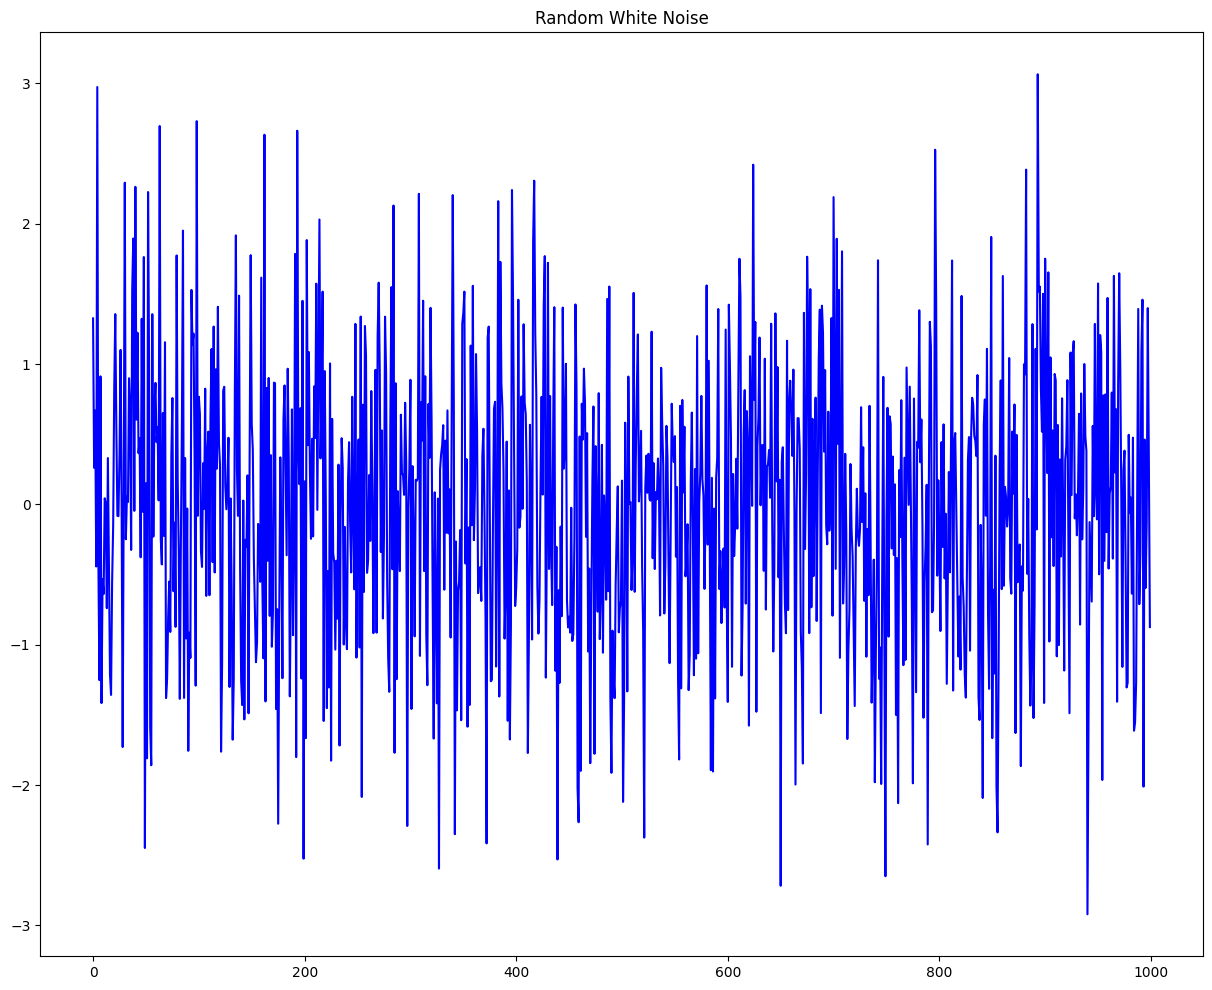

In [8]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b')

# 13. Detrend a Time Series
[Table of Contents](#table-of-contents)

Detrending a time series involves removing the trend component to isolate the stationary components of the series.
Several approaches can be employed to detrend a time series, each suitable for different types of trends and data characteristics:
1. Subtract the Line of Best Fit
2. Subtract the Trend Component from Decomposition
3. Subtract the Mean
4. Apply Filters

## 13.1 Subtract the Line of Best Fit
[Table of Contents](#table-of-contents)

**Use Linear Regression Model:**
+ Fit a linear regression model with time steps as the predictor to obtain the line of best fit. Subtract this line from the original series to remove linear trends.
+ For more complex trends, quadratic or higher-order polynomial terms can be included in the regression model.

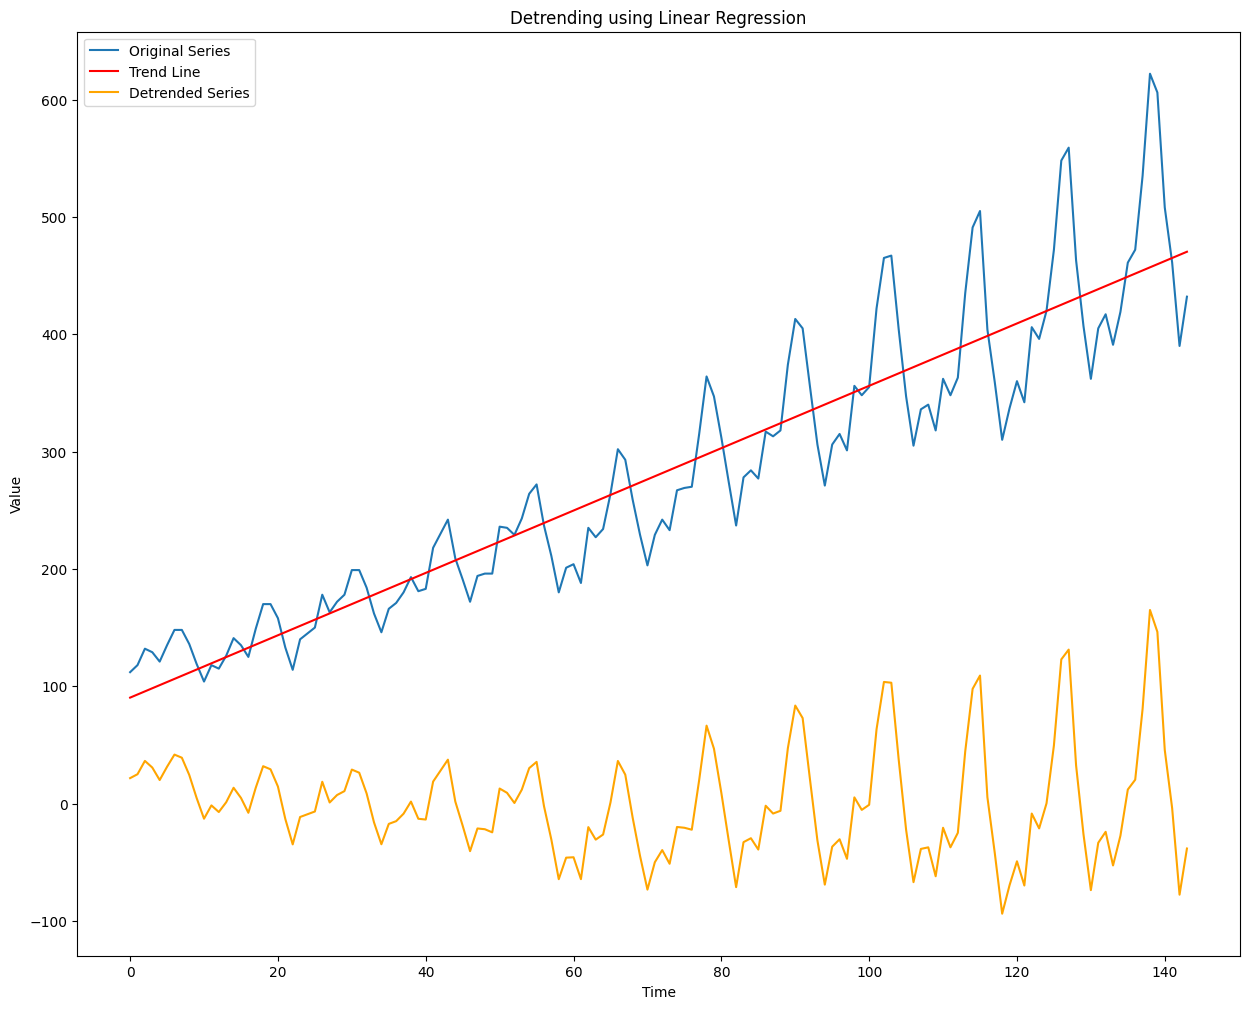

In [9]:
from scipy import signal

series = df['Number of Passengers'].values
detrended_series = signal.detrend(series)
trend_line = series - detrended_series

# Plot original and detrended series
plt.plot(series, label='Original Series')
plt.plot(trend_line, label='Trend Line', color='red')
plt.plot(detrended_series, label='Detrended Series', color='orange')
plt.title('Detrending using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 13.2 Subtract the Trend Component from Decomposition
[Table of Contents](#table-of-contents)

**Use Time Series Decomposition:**
+ Decompose the series into trend, seasonal, and residual components. Subtract the trend component to detrend the series.
+ Decomposition methods include additive and multiplicative models.

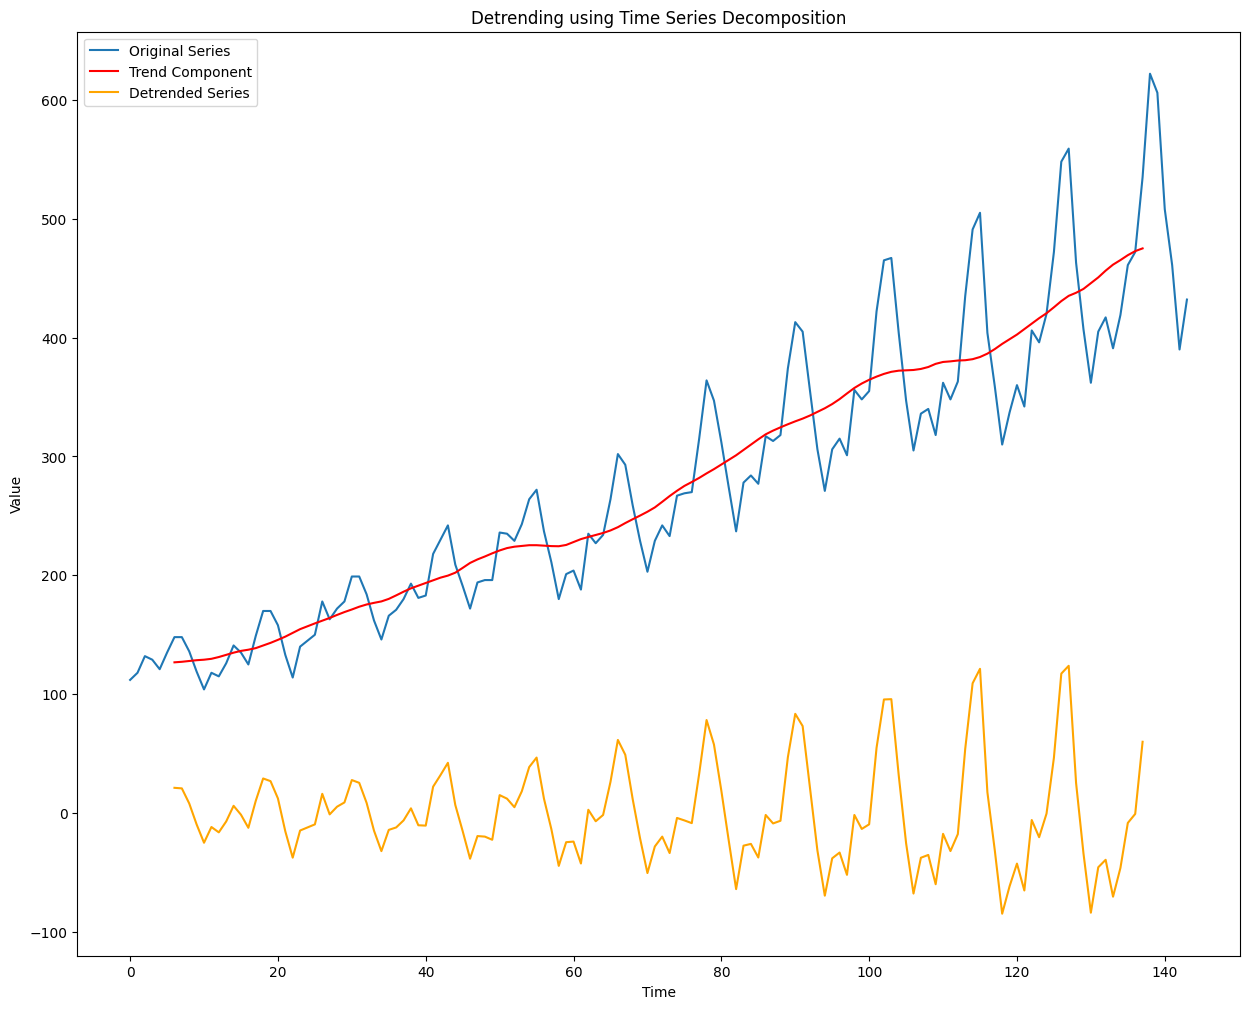

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = df['Number of Passengers'].values

# Decompose the series
multiplicative_decomposition = seasonal_decompose(series, model='multiplicative', period=12)
trend_component = multiplicative_decomposition.trend

# Detrend the series
detrended_series = series - trend_component

# Plot original and detrended series
plt.plot(series, label='Original Series')
plt.plot(trend_component, label='Trend Component', color='red')
plt.plot(detrended_series, label='Detrended Series', color='orange')
plt.title('Detrending using Time Series Decomposition')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# 14. Deseasonalize a Time Series
[Table of Contents](#table-of-contents)

Deseasonalizing a time series involves removing the seasonal component to better understand and model the underlying trends and noise. There are multiple approaches to deseasonalize a time series, each suitable for different scenarios and data characteristics.

1. Moving Average
2. Seasonal Differencing.
3. Divide by Seasonal Index (STL Decomposition)
4. Log Transformation and Deseasonalizing

## 14.1 Deseasonalize using Moving Average
[Table of Contents](#table-of-contents)

+ Calculate a moving average with a length equal to the seasonal window. This smoothens the series and reduces the seasonal effects.
+ The seasonal window is typically the number of periods in one season (e.g., 12 for monthly data with annual seasonality).

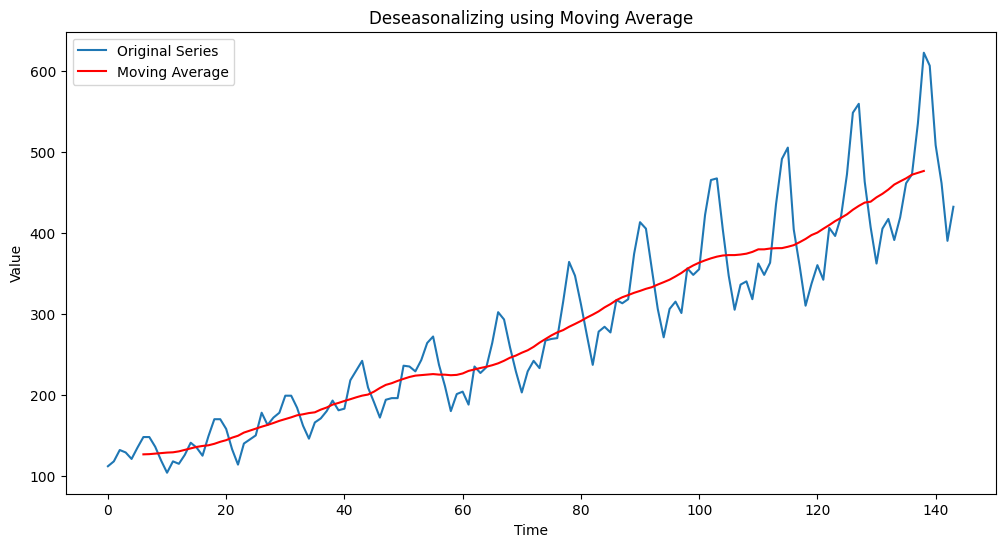

In [12]:
series = df['Number of Passengers'].values

window = 12
moving_avg = pd.Series(series).rolling(window=window, center=True).mean()

# Plot original series and moving average
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series')
plt.plot(moving_avg, label='Moving Average', color='red')
plt.title('Deseasonalizing using Moving Average')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## 14.2 Seasonal Differencing
[Table of Contents](#table-of-contents)

+ Subtract the value of the previous season from the current value. This method removes the seasonal component by differencing the series at the seasonal lag.

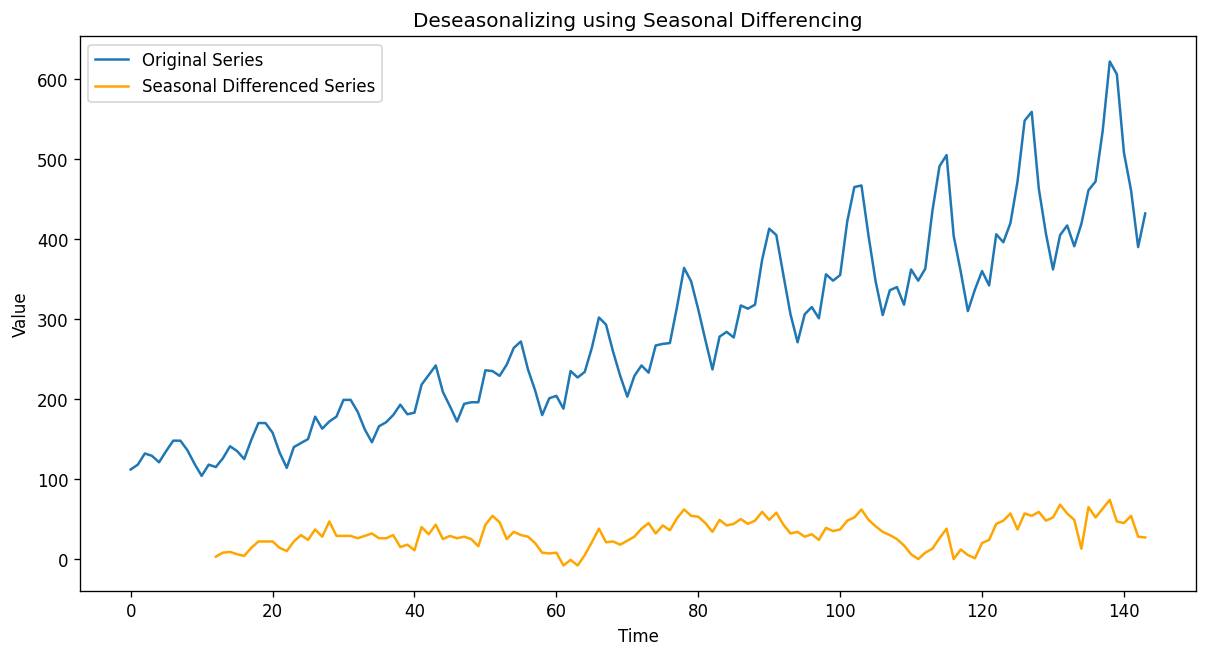

In [14]:
series = df['Number of Passengers'].values

# Seasonal differencing
seasonal_lag = 12
seasonal_diff = series[seasonal_lag:] - series[:-seasonal_lag]

# Plot original series and seasonal differenced series
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original Series')
plt.plot(np.arange(seasonal_lag, len(series)), seasonal_diff, label='Seasonal Differenced Series', color='orange')
plt.title('Deseasonalizing using Seasonal Differencing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## 14.3 Divide by Seasonal Index (STL Decomposition)
[Table of Contents](#table-of-contents)

+ Use Seasonal-Trend decomposition using LOESS (STL) to decompose the series into seasonal, trend, and residual components. Divide the series by the seasonal component.

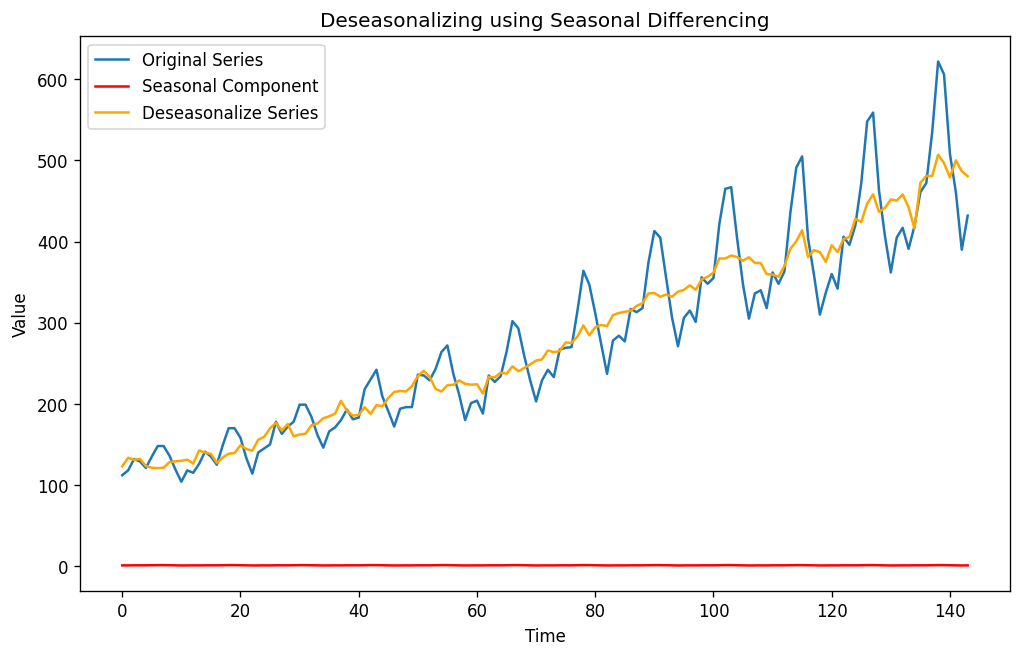

In [17]:
series = df['Number of Passengers'].values

multiplicative_decomposition = seasonal_decompose(series, model='multiplicative', period=12)
seasonal_component = multiplicative_decomposition.seasonal

# Deseasonalize
deseasonalize_series = series / seasonal_component

# Plot original series and seasonal differenced series
plt.plot(series, label='Original Series')
plt.plot(seasonal_component, label='Seasonal Component', color='red')
plt.plot(deseasonalize_series, label='Deseasonalize Series', color='orange')
plt.title('Deseasonalizing using Seasonal Differencing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# 15. How to test for seasonality of a time series?
[Table of Contents](#table-of-contents)

1.  Visual Inspection
2. Autocorrelation Function (ACF) Plot

## 15.1  Visual Inspection
[Table of Contents](#table-of-contents)

**Plot the Time Series:**
+ Plot the series and visually inspect for repeating patterns at fixed intervals.
+ Different types of seasonality include:
    + Hour of day
    + Day of month
    + Weekly
    + Monthly
    + Yearly

## 15.2 Autocorrelation Function (ACF) Plot
[Table of Contents](#table-of-contents)

**ACF Plot:**
+ The ACF plot helps identify seasonality by showing repeated spikes at multiples of the seasonal window.
+ Strong seasonal patterns will exhibit definitive spikes at these intervals.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

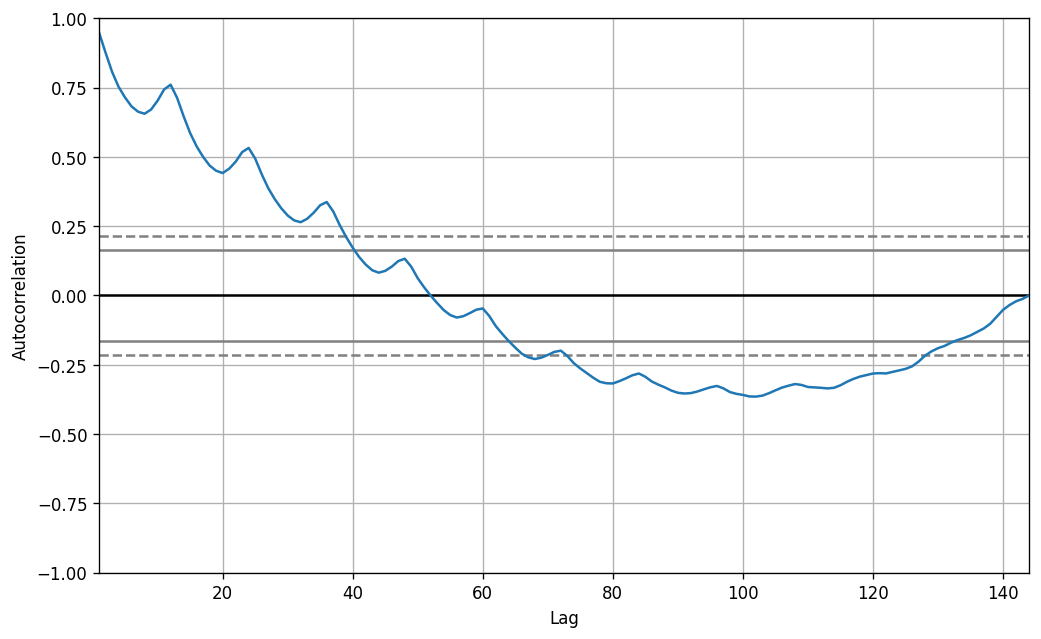

In [13]:
from pandas.plotting import autocorrelation_plot

series = df['Number of Passengers'].values

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(series.tolist())

## 16. Autocorrelation and Partial Autocorrelation Functions
[Table of Contents](#table-of-contents)

+ Autocorrelation is the correlation of a time series with its own past values (lags). It measures how past values influence current values.
    + If a series is significantly autocorrelated, previous values (lags) may help predict the current value.

+ Partial Autocorrelation measures the correlation between a series and its lag, excluding the effects of intermediate lags.
    + It provides the "pure" correlation of a series with a specific lag.

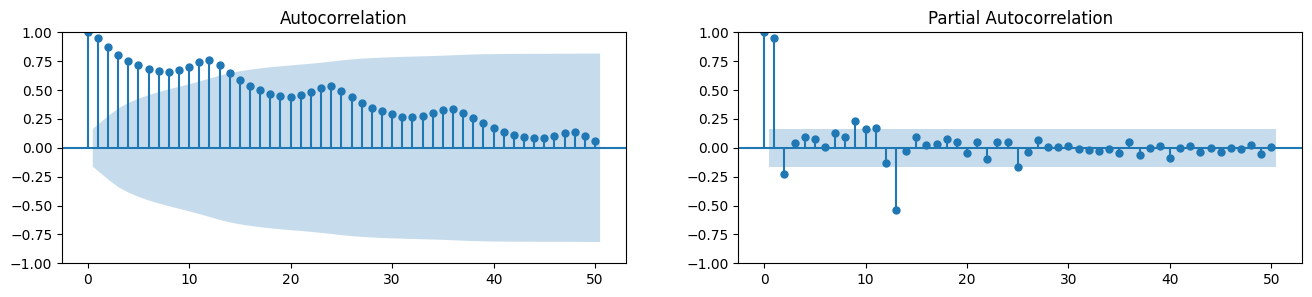

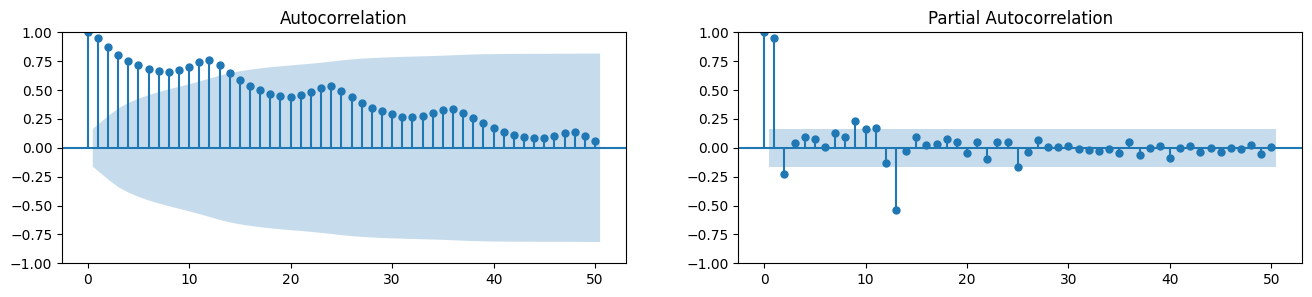

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

# 17. Computation of Partial Autocorrelation Function
[Table of Contents](#table-of-contents)

+ The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

+ For example, if $Y_t$ is the current series and $Y_{t-1}$ is the lag $1$ of $Y$, then the partial autocorrelation of lag $3$ $(Y_{t-3})$ is the coefficient $\alpha_3$ of $Y_{t-3}$ in the following equation:

![lags.png](img/lags.png)

# 18. Lag Plots
[Table of Contents](#table-of-contents)

Lag plots are visual tools used to identify patterns and autocorrelation in time series data. By plotting the time series against its lagged values, we can observe the relationship between the current and past values.

1. **Pattern Exists:**
    + If the points in the lag plot form a discernible pattern, the series is autocorrelated.
    + Patterns can be linear, curved, or other shapes, depending on the nature of the autocorrelation.

2. **No Pattern:**
    + If the points are randomly scattered without any discernible pattern, the series is likely white noise.
    + This indicates no significant autocorrelation.

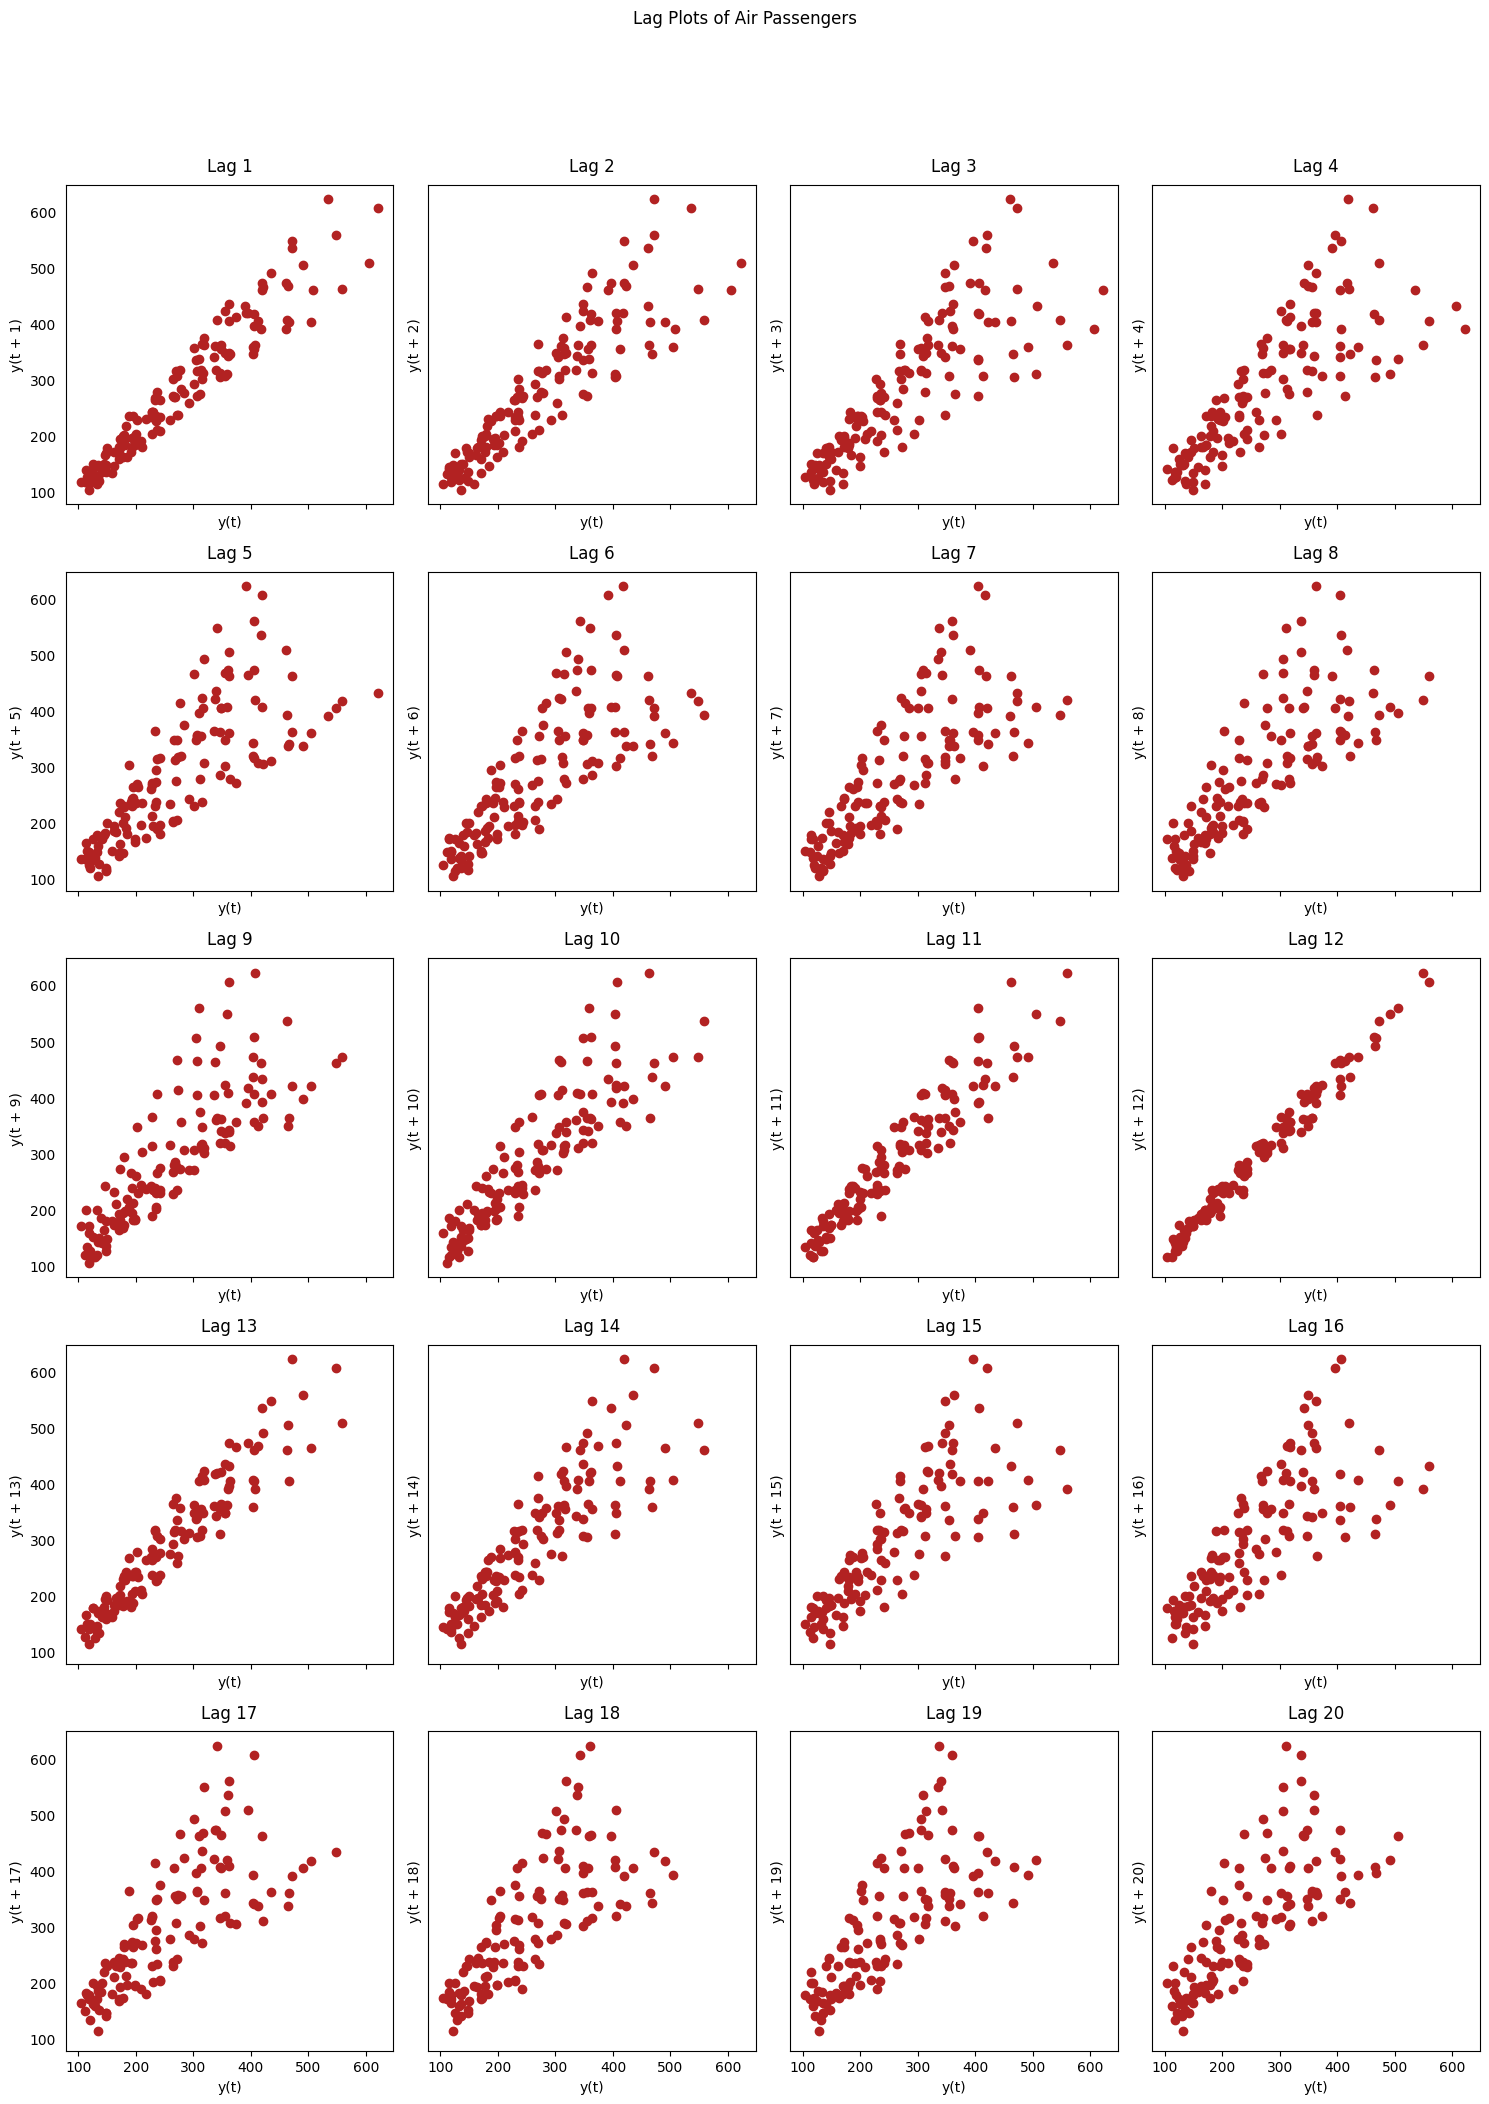

In [18]:
from pandas.plotting import lag_plot

plt.rcParams.update({'ytick.left': False, 'axes.titlepad': 10})

# Create subplots
fig, axes = plt.subplots(5, 4, figsize=(15, 20), sharex=True, sharey=True, dpi=100)

# Plot lag plots
for i, ax in enumerate(axes.flatten()[:20]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

# Set the main title
fig.suptitle('Lag Plots of Air Passengers', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# 19. Granger Causality Test
[Table of Contents](#table-of-contents)

Granger causality test is used to determine if one time series will be useful to forecast another. 

**Concept:**
+ Granger Causality based on the idea that if $X$ causes $Y$, then the forecast of $Y$ based on previous values of $Y$ and the previous values of $X$ should outperform the forecast of $Y$ based on previous values of $Y$ alone.

**Hepothesis:**
+ The test checks the null hypothesis that the series in the second column does not Granger-cause the series in the first column.

**Result:**
+ If the p-value is less than the significance level (commonly 0.05), we reject the null hypothesis and conclude that the series in the second column does Granger-cause the series in the first column.



In [16]:
from statsmodels.tsa.stattools import grangercausalitytests

path = "./data-sources/air-passengers/AirPassengers.csv"
df = pd.read_csv(path)
df.columns = ['Month', 'Number of Passengers']

# Convert 'Month' to datetime and extract the month
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df.Month.dt.month

# Perform Granger Causality Test
maxlag = 2
test_result = grangercausalitytests(df[['Number of Passengers', 'Month']], maxlag=maxlag, verbose=True)

# Interpretation of results
for lag in range(1, maxlag + 1):
    f_test_p_value = test_result[lag][0]['ssr_ftest'][1]
    if f_test_p_value < 0.05:
        print(f'Lag {lag}: Reject the null hypothesis. Month Granger-causes Number of Passengers at this lag.')
    else:
        print(f'Lag {lag}: Fail to reject the null hypothesis. No Granger causality at this lag.')



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=7.5667  , p=0.0059  , df=1
likelihood ratio test: chi2=7.3733  , p=0.0066  , df=1
parameter F test:         F=7.4080  , p=0.0073  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=10.3154 , p=0.0058  , df=2
likelihood ratio test: chi2=9.9579  , p=0.0069  , df=2
parameter F test:         F=4.9761  , p=0.0082  , df_denom=137, df_num=2
Lag 1: Reject the null hypothesis. Month Granger-causes Number of Passengers at this lag.
Lag 2: Reject the null hypothesis. Month Granger-causes Number of Passengers at this lag.


/Users/tunvx/miniconda3/envs/analyzer/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In the above case, the p-values are zero for all tests. So the ‘month’ indeed can be used to forecast the values.